## 📰 Fake News Detection using NLP and Machine Learning

### Introduction
With the rapid spread of online information, distinguishing **real news** from **fake news** has become a major challenge.  
This project aims to build a **Fake News Detection System** that classifies news articles as *“Real”* or *“Fake”* using **Natural Language Processing (NLP)** and **Machine Learning**.

We’ll use the **Fake News Detection Dataset from Kaggle**, which contains labeled articles with their titles and text content.


### 🚀 Goal:
Build an intelligent system that automatically identifies whether a news article is real or fake based on its content.


###Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


###Loading Dataset


In [2]:
df = pd.read_csv("8.data.csv")

###Data Exploration

In [3]:
df.head()


,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      4009 non-null   object
 1   Headline  4009 non-null   object
 2   Body      3988 non-null   object
 3   Label     4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [5]:
# Statistical Overview
df.describe(include = "all")

,URLs,Headline,Body,Label
count,4009,4009,3988,4009.000000
unique,3352,2831,2863,NaN
top,http://beforeitsnews.com/sports/2017/09/930-ex...,"10/3 Happenings: HBD Cap, Johnny, Dog, Tomato,...",A Potato Battery Can Light up a Room for Over ...,NaN
freq,5,6,143,NaN
mean,NaN,NaN,NaN,0.466949
std,NaN,NaN,NaN,0.498969
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,1.000000


## Exploratory Data Analysis

In [6]:
# Check missing values
df.isnull().sum()

,0
URLs,0
Headline,0
Body,21
Label,0


/tmp/ipython-input-598799440.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, palette='coolwarm')


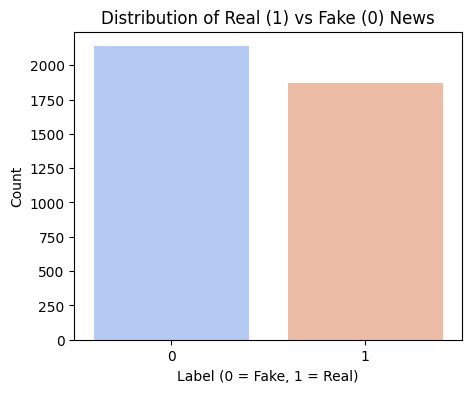

Label
0    53.305064
1    46.694936
Name: proportion, dtype: float64


In [7]:
# ✅ Count of real vs fake news
plt.figure(figsize=(5,4))
sns.countplot(x='Label', data=df, palette='coolwarm')
plt.title('Distribution of Real (1) vs Fake (0) News')
plt.xlabel('Label (0 = Fake, 1 = Real)')
plt.ylabel('Count')
plt.show()

# Percentage distribution
label_counts = df['Label'].value_counts(normalize=True) * 100
print(label_counts)

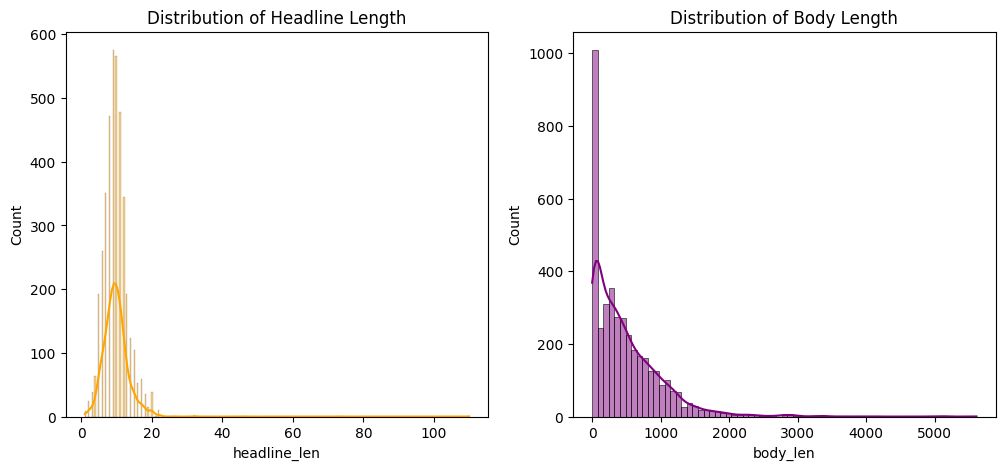

In [8]:
#Headline and Body Length Analysis

# Fix for missing/non-string entries in 'Body' column
df['headline_len'] = df['Headline'].apply(lambda x: len(str(x).split()))
df['body_len'] = df['Body'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)

# Plot distributions again
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['headline_len'], kde=True, color='orange')
plt.title('Distribution of Headline Length')

plt.subplot(1,2,2)
sns.histplot(df['body_len'], kde=True, color='purple')
plt.title('Distribution of Body Length')
plt.show()


In [9]:
#Average Word Length by Label
avg_body_len = df.groupby('Label')['body_len'].mean()
avg_headline_len = df.groupby('Label')['headline_len'].mean()

print("Average Headline Length by Label:\n", avg_headline_len)
print("\n Average Body Length by Label:\n", avg_body_len)


Average Headline Length by Label:
 Label
0    10.384183
1     9.134615
Name: headline_len, dtype: float64

 Average Body Length by Label:
 Label
0    394.565746
1    591.077457
Name: body_len, dtype: float64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


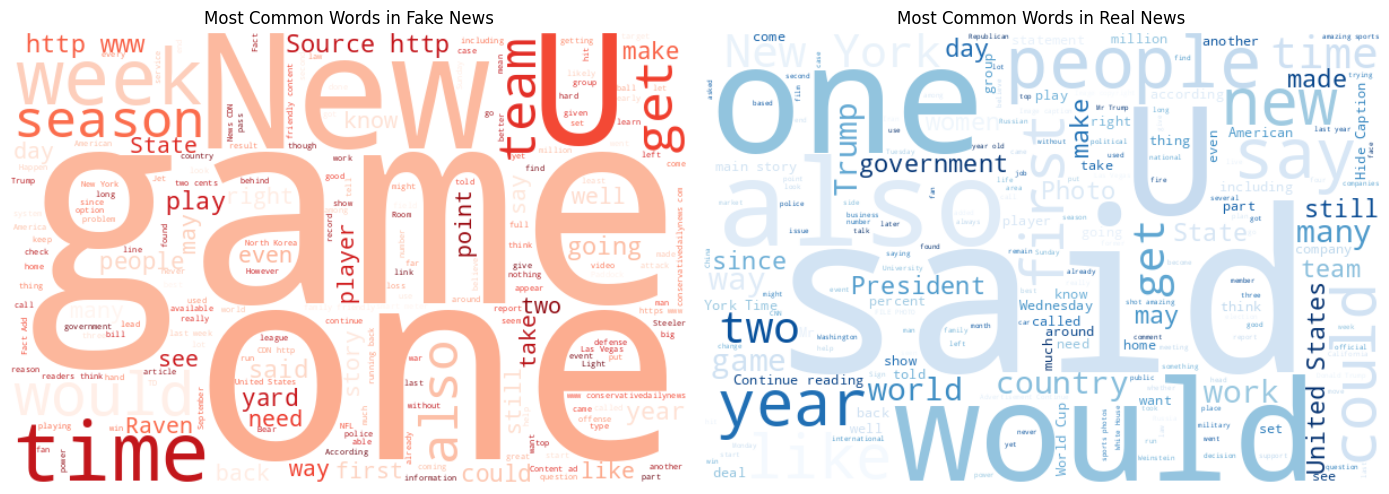

In [10]:
#WordCloud code with stopwords removed
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already done
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Combine text for fake and real separately, safely handling NaNs
fake_text = ' '.join(df[df['Label'] == 0]['Body'].dropna().astype(str))
real_text = ' '.join(df[df['Label'] == 1]['Body'].dropna().astype(str))

# Plot WordClouds
plt.figure(figsize=(14,6))

# WordCloud for Fake News
plt.subplot(1,2,1)
wc_fake = WordCloud(width=600, height=400, background_color='white', colormap='Reds', stopwords=stop_words).generate(fake_text)
plt.imshow(wc_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Fake News')

# WordCloud for Real News
plt.subplot(1,2,2)
wc_real = WordCloud(width=600, height=400, background_color='white', colormap='Blues', stopwords=stop_words).generate(real_text)
plt.imshow(wc_real, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Real News')

plt.tight_layout()
plt.show()



##Preprocessing

###1. Text Cleaning:
1. Lowercase all text.
2. Remove punctuation, special characters, numbers, URLs, and extra whitespace.

In [11]:
import re

def clean_text(text):
    text = str(text)  # ensure it's a string
    text = text.lower()  # lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'\n', ' ', text)  # remove newlines
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation & numbers
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra whitespace
    return text

# Apply cleaning to both Headline and Body
df['clean_headline'] = df['Headline'].apply(clean_text)
df['clean_body'] = df['Body'].apply(lambda x: clean_text(x) if isinstance(x, str) else '')


###2. Tokenization & Stopword Removal

In [15]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Clean text function
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # remove URLs
    text = re.sub(r'\n', ' ', text)  # remove newlines
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation & numbers
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra whitespace
    # simple tokenization + stopword removal
    words = [word for word in text.split() if word not in stop_words]
    return ' '.join(words)

# Apply to Headline and Body
df['clean_headline'] = df['Headline'].apply(clean_text)
df['clean_body'] = df['Body'].apply(lambda x: clean_text(x) if isinstance(x, str) else '')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###3. Feature Extraction (Vectorization TF-IDF)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine headline and body
df['text'] = df['clean_headline'] + ' ' + df['clean_body']

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['text'])
y = df['Label']

### 4. Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Model Training

Logistic Regression Accuracy: 0.972568578553616

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       455
           1       0.96      0.97      0.97       347

    accuracy                           0.97       802
   macro avg       0.97      0.97      0.97       802
weighted avg       0.97      0.97      0.97       802



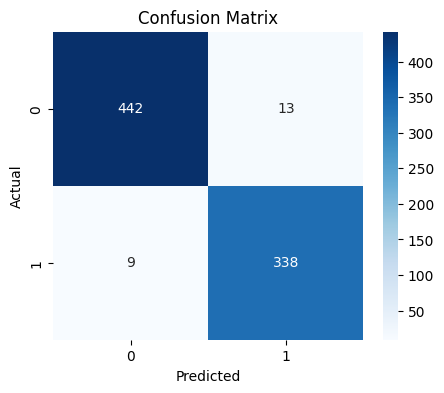

In [25]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Naive Bayes Accuracy: 0.9152119700748129

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       455
           1       0.86      0.96      0.91       347

    accuracy                           0.92       802
   macro avg       0.91      0.92      0.91       802
weighted avg       0.92      0.92      0.92       802



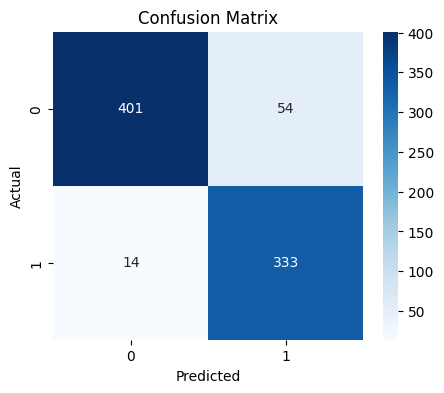

In [26]:
# Multinomial Naive Bayes (good for text)
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

cm = confusion_matrix(y_test, y_pred_nb)  # replace y_pred with model predictions

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Random Forest Accuracy: 0.9763092269326683

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       455
           1       0.95      1.00      0.97       347

    accuracy                           0.98       802
   macro avg       0.97      0.98      0.98       802
weighted avg       0.98      0.98      0.98       802



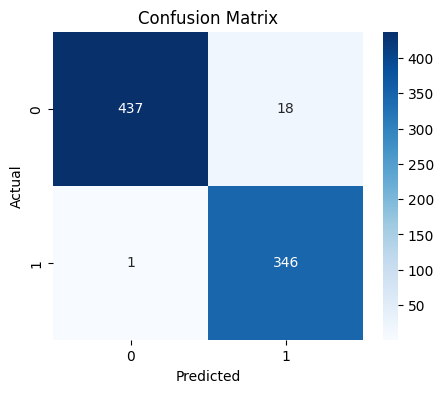

In [27]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)  # replace y_pred with model predictions

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:40:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9825436408977556

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       455
           1       0.97      0.99      0.98       347

    accuracy                           0.98       802
   macro avg       0.98      0.98      0.98       802
weighted avg       0.98      0.98      0.98       802



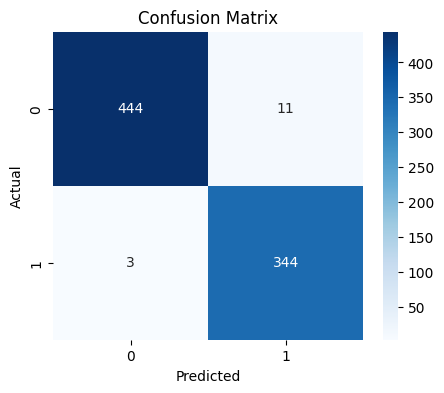

In [28]:
#XGBoost Classifier
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

cm = confusion_matrix(y_test, y_pred_xgb)  # replace y_pred with model predictions

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [29]:
# Model accuracies
data = {
    "Model": ["Logistic Regression", "Naive Bayes", "Random Forest", "XGBoost"],
    "Accuracy": [0.973, 0.915, 0.976, 0.978]
}

df_accuracy = pd.DataFrame(data)

# Display table
print("✅ Model Accuracies:\n")
display(df_accuracy)

✅ Model Accuracies:



,Model,Accuracy
0,Logistic Regression,0.973
1,Naive Bayes,0.915
2,Random Forest,0.976
3,XGBoost,0.978


Best Model:
 **XGBoost** is the best model:
- **Highest accuracy**: 0.978
- **High precision & recall** for both classes (Fake = 0, Real = 1)
- **Balanced F1-score** → good overall performance for both Fake and Real news

Random Forest is a close second (0.976), and Logistic Regression is also very strong (0.973). Naive Bayes is slightly lower (0.915).

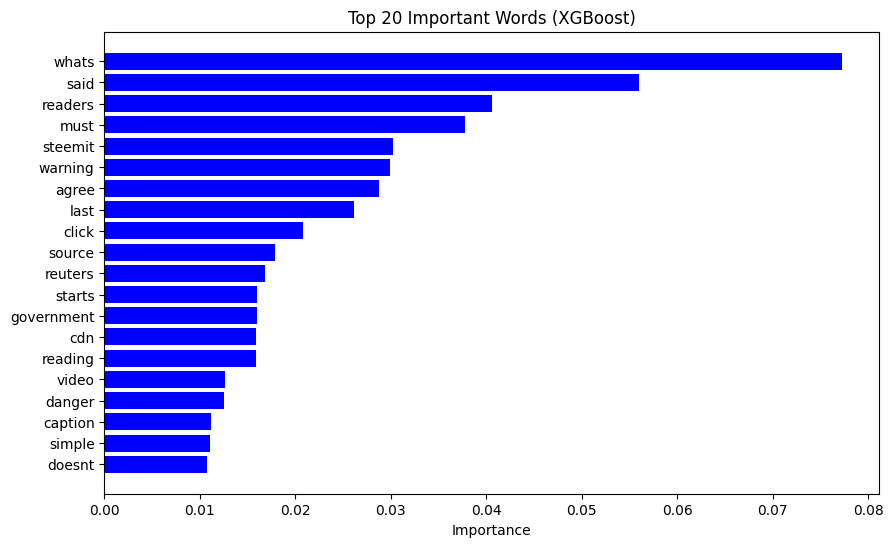

In [30]:
# Get feature importances from XGBoost
importances = xgb_model.feature_importances_
features = np.array(tfidf.get_feature_names_out())

# Get top 20 features
indices = np.argsort(importances)[-20:]

# Plot top 20 important words
plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], color='blue')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel("Importance")
plt.title("Top 20 Important Words (XGBoost)")
plt.show()

##**Insights**

*Fake vs Real text characteristics* (from your EDA & WordClouds):  
- Fake news articles tend to have **longer headlines but shorter bodies** on average.  
- Real news articles have **slightly shorter headlines but longer bodies**.  
- Certain words are more common in Fake news *(clickbait-y words)* vs Real news *(factual reporting)*.

*Model insights:*  
- **XGBoost** captures complex word patterns better than simpler models like Logistic Regression or Naive Bayes.  
- Tree-based models like Random Forest and XGBoost are more **robust to noisy text features**.  
- Stopwords removal and TF-IDF vectorization helped models focus on **meaningful words** rather than filler words.

**Practical takeaway:**  
- XGBoost can be used as a **reliable fake news detector** on similar datasets.  
- Feature importance from XGBoost can highlight **which words contribute most to predictions**, helping interpret why a news article is flagged as Fake or Real.